
# Przepływ Poiseuille'a między dwiema płytami z siłą zewnętrzną

Rozważamy przepływ stacjonarny płynu lepkiego między dwiema nieruchomymi, równoległymi płytami, oddalonymi od siebie o odległość $ h $. 
Siła zewnętrzna $ F_e $ działa wzdłuż osi $ x $, powodując ruch płynu.

## Wyprowadzenie równań

Przepływ opisuje równanie Naviera-Stokesa dla stacjonarnego przepływu laminarnych w jednym wymiarze (w kierunku $ x $):

$$\rho \left( \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} \right) = -\frac{\partial p}{\partial x} + \mu \frac{\partial^2 u}{\partial y^2} + F_e,$$

gdzie:
- $ \rho $ to gęstość płynu,
- $ u $ to prędkość płynu w kierunku $ x $,
- $ p $ to ciśnienie,
- $ \mu $ to lepkość płynu,
- $ F_e $ to siła zewnętrzna.

Zakładamy, że przepływ jest stacjonarny (niezmienny w czasie) i jednowymiarowy, czyli $ \frac{\partial u}{\partial t} = 0 $ oraz $ \frac{\partial u}{\partial x} = 0 $. W takim przypadku równanie upraszcza się do:

$$0 = -\frac{dp}{dx} + \mu \frac{d^2 u}{dy^2} + F_e$$

Przekształcamy to równanie do postaci:

$$\mu \frac{d^2 u}{dy^2} = -\frac{dp}{dx} - F_e$$

## Rozwiązanie równań

Całkując dwukrotnie względem $ y $, otrzymujemy ogólne rozwiązanie:

$$u(y) = \frac{1}{2\mu} \left( \frac{dp}{dx} + F_e \right) y^2 + C_1 y + C_2$$

gdzie $ C_1 $ i $ C_2 $ są stałymi całkowania.

## Warunki brzegowe

Zakładamy, że na powierzchniach płyt (w punktach $ y = 0 $ i $ y = h $) prędkość płynu wynosi zero, czyli:

$$u(0) = 0 \quad \text{i} \quad u(h) = 0$$

Podstawiając te warunki do ogólnego rozwiązania, znajdujemy stałe $ C_1 $ i $ C_2 $. Ostatecznie otrzymujemy:

$$C_2 = 0 \quad \text{oraz} \quad C_1 = -\frac{1}{2\mu} \left( \frac{dp}{dx} + F_e \right) h$$

Zatem rozwiązanie dla profilu prędkości ma postać:

$$u(y) = \frac{1}{2\mu} \left( \frac{dp}{dx} + F_e \right) (y^2 - hy)$$


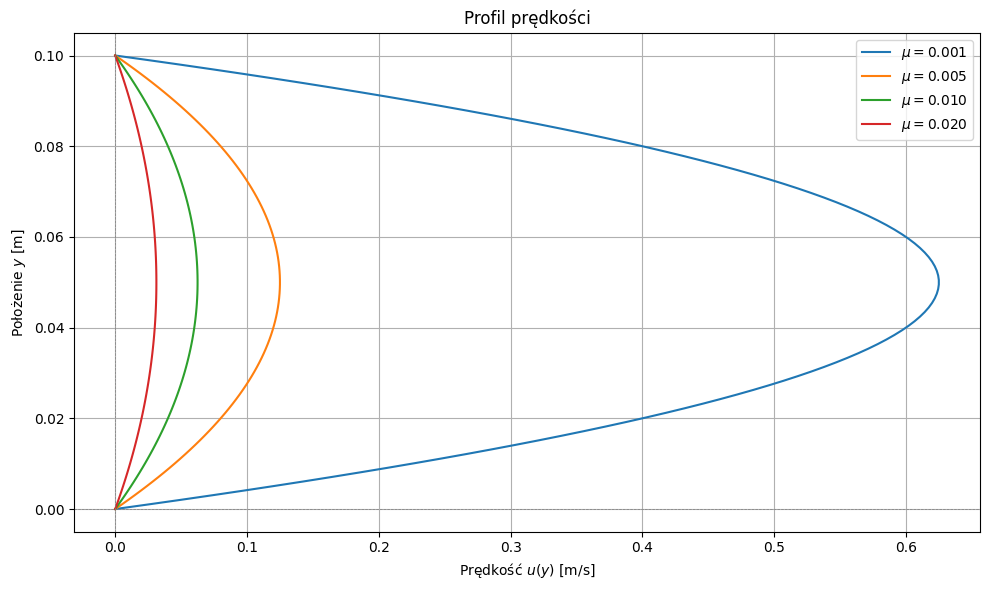

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def velocity_profile(y, mu, dp_dx, h, F_e):
    return (1 / (2 * mu)) * (dp_dx + F_e) * (y**2 - h * y)

h = 0.1  # odległość między płytami [m]
fixed_dp_dx = -1.0  # gradient ciśnienia [Pa/m]
fixed_F_e = 0.5  # siła zewnętrzna [N/m^3]

y_values = np.linspace(0, h, 100)  

# różne wartości lepkości
mu_values = [0.001, 0.005, 0.01, 0.02]

plt.figure(figsize=(10, 6))

for mu in mu_values:
    u_values = velocity_profile(y_values, mu, fixed_dp_dx, h, fixed_F_e)
    plt.plot(u_values, y_values, label=f'$\\mu={mu:.3f}$')

plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.xlabel('Prędkość $u(y)$ [m/s]')
plt.ylabel('Położenie $y$ [m]')
plt.title('Profil prędkości')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()